In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
import plotly.graph_objects as go

from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)

In [2]:
#lire fichier nettoyé csv
df = pd.read_csv('openfoodfact_nettoyer.csv',sep='\t')
df.head()

,Unnamed: 0,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,1,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
1,3,Organic Salted Nut Mix,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
2,7,Organic Muesli,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
3,12,Zen Party Mix,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
4,15,Cinnamon Nut Granola,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


In [3]:
#colonne unnamed à supprimer
df.drop(columns=['Unnamed: 0'],inplace=True)

In [4]:
df.head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
1,Organic Salted Nut Mix,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
2,Organic Muesli,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
3,Zen Party Mix,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
4,Cinnamon Nut Granola,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


Text(0, 0.5, 'energy_100g')

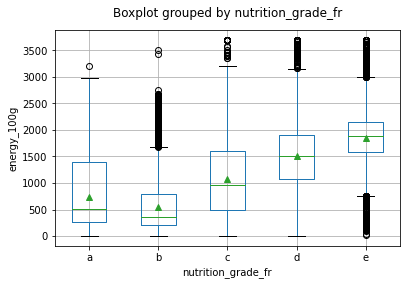

In [8]:
df.boxplot('energy_100g',by='nutrition_grade_fr',showmeans=True);
plt.title('')
plt.ylabel('energy_100g')

### 1ere façon ANOVA

In [9]:


mod = ols('energy_100g ~ nutrition_grade_fr',data=df).fit()

In [10]:
aov_table = sm.stats.anova_lm(mod,typ=2)
print(aov_table)

                          sum_sq        df             F  PR(>F)
nutrition_grade_fr  3.110075e+10       4.0  23278.704081     0.0
Residual            5.044334e+10  151026.0           NaN     NaN


### 2eme façon ANOVA

In [11]:
df_anova=df[['nutrition_grade_fr','energy_100g']]
grps= pd.unique(df_anova.nutrition_grade_fr.values)
print(grps)

['d' 'c' 'b' 'a' 'e']


In [12]:
d_data = {grp:df_anova['energy_100g'][df_anova.nutrition_grade_fr == grp] for grp in grps}


In [13]:
F, p = f_oneway(d_data['d'],d_data['c'],d_data['b'],d_data['a'],d_data['e'])
print("p_value :",p)
if p < 0.05:
    print("rejet H0")
else:
    print("accept H0")

p_value : 0.0
rejet H0


Text(0.5, 1.0, 'Nombre de produits selon le nutriscore')

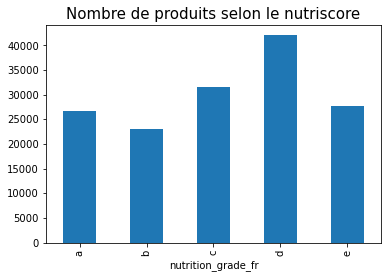

In [11]:
df_anova.groupby(['nutrition_grade_fr']).size().plot(kind="bar")
plt.title('Nombre de produits selon le nutriscore',fontsize=15)

In [12]:
pearson = df.corr(method='pearson')
pearson

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
energy_100g,1.000000,0.764769,0.559815,0.574875,0.350150,0.306646,0.304376,0.023359,0.023359,0.632122
fat_100g,0.764769,1.000000,0.705022,-0.034721,0.019443,0.156773,0.283209,0.009328,0.009327,0.578976
saturated-fat_100g,0.559815,0.705022,1.000000,0.001610,0.170202,0.009864,0.179696,-0.016112,-0.016114,0.658429
carbohydrates_100g,0.574875,-0.034721,0.001610,1.000000,0.615931,0.263727,-0.115655,-0.026665,-0.026665,0.275621
sugars_100g,0.350150,0.019443,0.170202,0.615931,1.000000,-0.019433,-0.271654,-0.112268,-0.112267,0.496897
fiber_100g,0.306646,0.156773,0.009864,0.263727,-0.019433,1.000000,0.235585,-0.010557,-0.010558,-0.139198
proteins_100g,0.304376,0.283209,0.179696,-0.115655,-0.271654,0.235585,1.000000,0.113454,0.113453,0.097822
salt_100g,0.023359,0.009328,-0.016112,-0.026665,-0.112268,-0.010557,0.113454,1.000000,1.000000,0.176931
sodium_100g,0.023359,0.009327,-0.016114,-0.026665,-0.112267,-0.010558,0.113453,1.000000,1.000000,0.176931
nutrition-score-fr_100g,0.632122,0.578976,0.658429,0.275621,0.496897,-0.139198,0.097822,0.176931,0.176931,1.000000


Text(0.5, 1.0, 'Tableau de corrélation de nos variables')

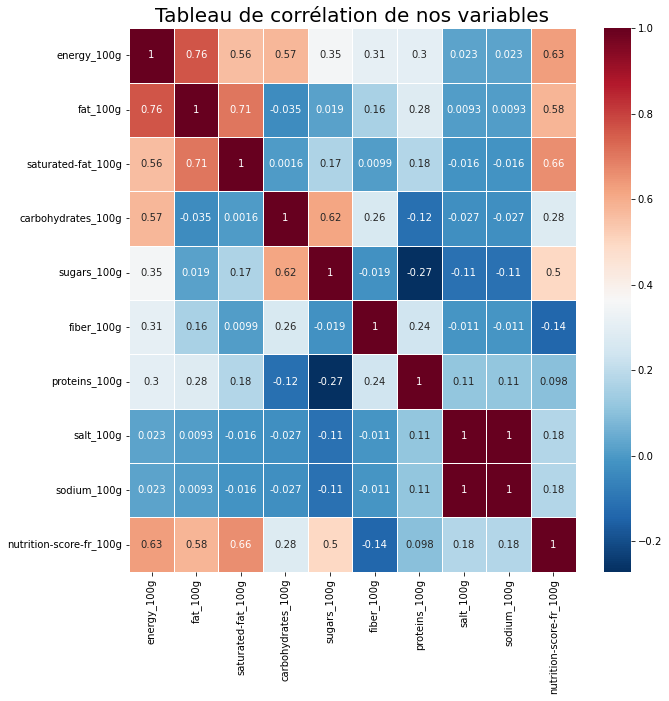

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(pearson, 
            xticklabels=pearson.columns,
            yticklabels=pearson.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

plt.title('Tableau de corrélation de nos variables',fontsize=20)

### Réduction de dimensions en utilisant l'ACP

In [5]:
X = df.select_dtypes('number')
y = df['nutrition_grade_fr']

In [6]:
X.drop(columns=['nutrition-score-fr_100g'],inplace=True)

In [7]:
X.head()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
0,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000
1,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482
2,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055
3,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633
4,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009


In [11]:
scaler = StandardScaler()

#normalisaion centrée-réduite
X_scaled = scaler.fit_transform(X)

#conversion en dataframe
X_scaled = pd.DataFrame(X_scaled, index=X.index,columns=X.columns)

In [12]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

In [13]:
#conversion dataframe

pca_columns = ['PC' + str(c) for c in range(1, X_pca.shape[1]+1,1)]

X_pca = pd.DataFrame(X_pca, index=X.index, columns = pca_columns)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,3.085011,-0.558846,-0.593118,-1.360620,0.867515,0.298701,2.051284,-0.045298,-8.700265e-06
1,2.693777,1.084841,-1.791334,0.695950,0.304840,-0.986905,-1.459892,0.132393,-2.262075e-07
2,1.432590,-0.357197,-0.057555,1.602099,0.072610,-0.016809,0.033310,0.032720,-2.377244e-06
3,1.901492,0.904394,-0.892830,0.957372,-0.006935,-0.741764,-0.539375,-0.000366,1.184018e-06
4,1.320693,-0.537842,0.199919,1.702431,-0.154651,-0.047776,-0.320705,0.061309,-1.437956e-06


In [20]:
#proportion de variance expliquée selon les principaux composants
explained_variance = pd.Series(dict(zip(X_pca.columns,pca.explained_variance_ratio_)))
print(explained_variance.head())

PC1    0.301820
PC2    0.234816
PC3    0.186932
PC4    0.131413
PC5    0.069814
dtype: float64


In [21]:
#cumul des proportions de variance expliquée
cumulative_explained_variance = pd.Series(dict(zip(X_pca.columns,np.cumsum(pca.explained_variance_ratio_))))
print(cumulative_explained_variance.head())

PC1    0.301820
PC2    0.536636
PC3    0.723567
PC4    0.854981
PC5    0.924794
dtype: float64


Text(0.5, 1.0, 'Droite représentant le cumul des variances expliquées')

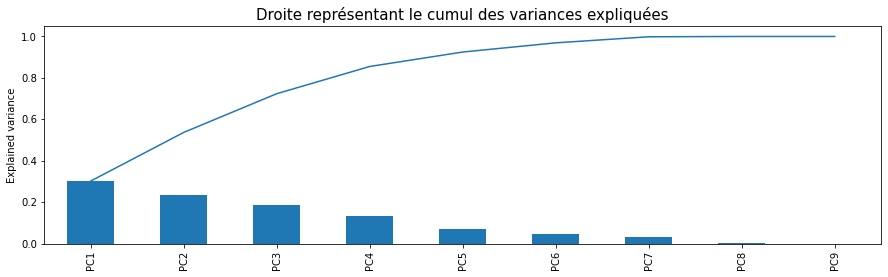

In [22]:
explained_variance.plot(kind='bar',figsize=(15,4),ylabel='Explained variance')
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Droite représentant le cumul des variances expliquées',fontsize=15)

In [23]:
#voir la composition de chaque composants principaux
pca.components_

array([[ 5.81825975e-01,  4.89066790e-01,  4.37049599e-01,
         2.91297398e-01,  2.38123387e-01,  2.20985470e-01,
         2.02133638e-01, -3.89530572e-03, -3.89585657e-03],
       [ 2.95816130e-03,  1.19521332e-01,  5.58645257e-02,
        -2.23292316e-01, -3.02479269e-01,  1.52351615e-02,
         2.66892995e-01,  6.20390415e-01,  6.20389910e-01],
       [ 6.63210490e-02, -3.02891112e-01, -2.37308145e-01,
         5.47167367e-01,  4.81157873e-01,  3.27777115e-02,
        -3.23622748e-01,  3.24677891e-01,  3.24679100e-01],
       [ 3.75079490e-02, -1.97434104e-01, -3.99567840e-01,
         2.03255413e-01, -2.25732157e-01,  7.26405294e-01,
         4.09500196e-01, -7.85352805e-02, -7.85356516e-02],
       [-8.52056049e-02,  2.16510137e-01,  1.42839016e-01,
        -1.81243708e-01, -1.74224023e-01,  5.63300450e-01,
        -7.34947673e-01,  4.89985586e-02,  4.89974632e-02],
       [-3.84181585e-01, -2.80472576e-01,  4.54501317e-01,
        -3.09047403e-01,  5.54041263e-01,  3.207066

### Cercle de corrélation

In [20]:
df_corr = df.copy()

df_corr.drop(columns=['product_name'],axis=1,inplace=True)
df_corr.head()

,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0
1,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0
2,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0
3,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0
4,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0


In [21]:
for i in range(0,9):
    df_corr['PC' + str(i+1)] = X_pca['PC' +str(i+1)]

df_corr.head()

,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,d,2243.0,28.57,28.57,64.29,14.29,3.6,3.57,0.00000,0.000,14.0,3.085011,-0.558846,-0.593118,-1.360620,0.867515,0.298701,2.051284,-0.045298,-8.700265e-06
1,d,2540.0,57.14,5.36,17.86,3.57,7.1,17.86,1.22428,0.482,12.0,2.693777,1.084841,-1.791334,0.695950,0.304840,-0.986905,-1.459892,0.132393,-2.262075e-07
2,c,1833.0,18.75,4.69,57.81,15.62,9.4,14.06,0.13970,0.055,7.0,1.432590,-0.357197,-0.057555,1.602099,0.072610,-0.016809,0.033310,0.032720,-2.377244e-06
3,d,2230.0,36.67,5.00,36.67,3.33,6.7,16.67,1.60782,0.633,12.0,1.901492,0.904394,-0.892830,0.957372,-0.006935,-0.741764,-0.539375,-0.000366,1.184018e-06
4,b,1824.0,18.18,1.82,60.00,21.82,9.1,14.55,0.02286,0.009,0.0,1.320693,-0.537842,0.199919,1.702431,-0.154651,-0.047776,-0.320705,0.061309,-1.437956e-06


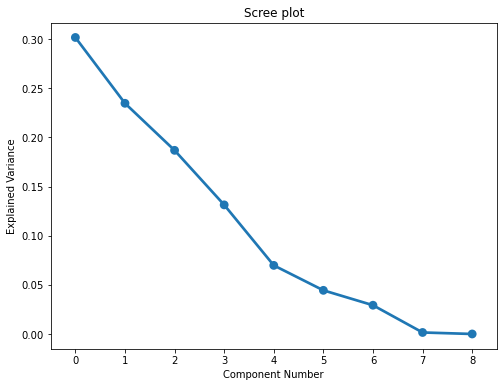

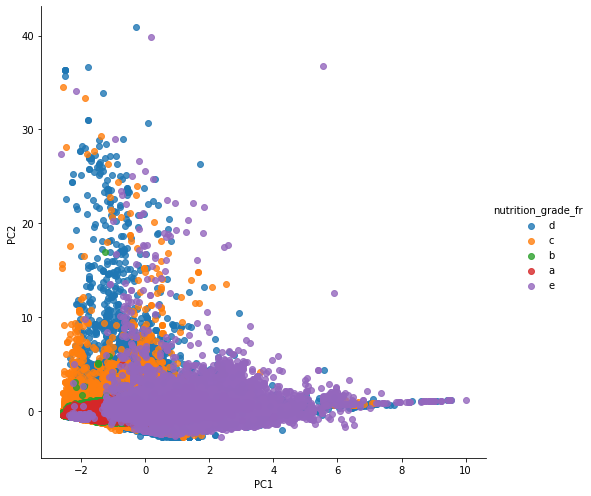

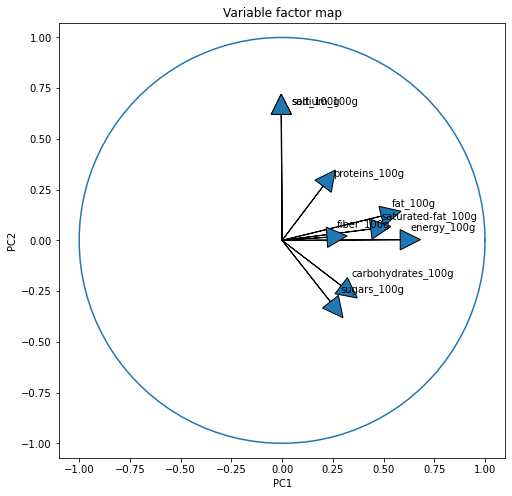

In [25]:
ind = np.arange(0,9)
fig, ax = plt.subplots(figsize=(8,6))
sns.pointplot(x=ind, y=pca.explained_variance_ratio_)
ax.set_title('Scree plot')
ax.set_xticks(ind)
ax.set_xticklabels(ind)
ax.set_xlabel('Component Number')
ax.set_ylabel('Explained Variance')
plt.show()

g = sns.lmplot('PC1','PC2',hue='nutrition_grade_fr',data=df_corr,fit_reg=False,scatter=True,size=7)
plt.show()

fig, ax = plt.subplots(figsize=(8,8))
for i in range (0,pca.components_.shape[1]):
    ax.arrow(0,
            0,
            pca.components_[0,i],
            pca.components_[1,i],
            head_width=0.1,
            head_length=0.1)
    
    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             df_corr.columns.values[i+1])

an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
plt.show()

<AxesSubplot:title={'center':'Visuation des grades de nutriscore selon P1 et P2'}, xlabel='PC1', ylabel='PC2'>

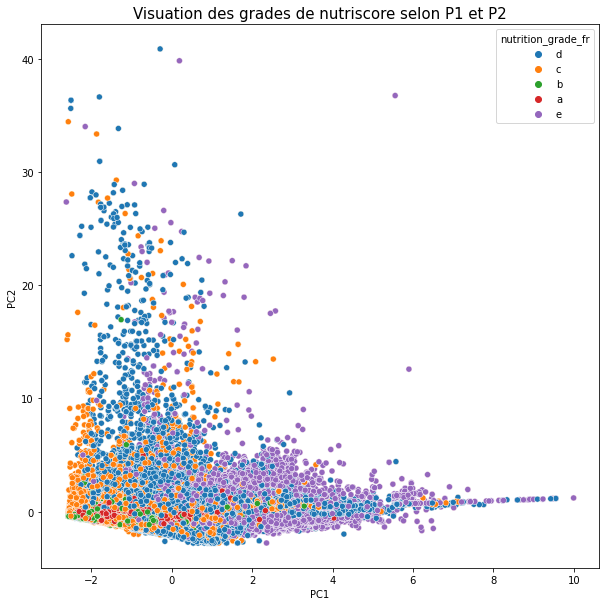

In [27]:
#Visulation des 2eres composantes principales
dict_colors = {'a':'forestgreen','b':'royalblue','c':'yellow','d':'orange','e':'crimson'}
y_colors =[dict_colors[yi] for yi in y]
X_pca.plot(x='PC1',y='PC2',kind='scatter',figsize=(10,10),color=y_colors)
plt.title('Visuation des grades de nutriscore selon P1 et P2',fontsize=15)
sns.scatterplot(data=X_pca,x='PC1',y='PC2',hue=df['nutrition_grade_fr'])

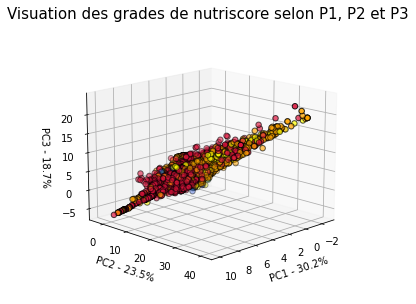

In [28]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca['PC1'],X_pca['PC2'],X_pca['PC3'],marker='o',s=30,edgecolor='k',facecolor=y_colors)
ax.set_xlabel('PC1 - ' + '{:.1f}%'.format(explained_variance['PC1']*100))
ax.set_ylabel('PC2 - ' + '{:.1f}%'.format(explained_variance['PC2']*100))
ax.set_zlabel('PC3 - ' + '{:.1f}%'.format(explained_variance['PC3']*100))
plt.title('Visuation des grades de nutriscore selon P1, P2 et P3',fontsize=15)
ax.view_init(elev=15,azim=45)

In [29]:
#normaliser les valeurs
df_appli = df.copy()
#remplir les valeurs du tableau par des proportions 

def proportion_tab(column):
    df_appli[str(column)]=(df_appli[str(column)] - df_appli[str(column)].min()) /(df_appli[str(column)].max() - df_appli[str(column)].min())
    
proportion_tab('energy_100g')
proportion_tab('fat_100g')
proportion_tab('saturated-fat_100g')
proportion_tab('carbohydrates_100g')
proportion_tab('sugars_100g')
proportion_tab('fiber_100g')
proportion_tab('proteins_100g')
proportion_tab('sodium_100g')
df_appli.head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,Banana Chips Sweetened (Whole),d,0.606131,0.2857,0.285986,0.6429,0.1429,0.036,0.0357,0.00000,0.000000,14.0
1,Organic Salted Nut Mix,d,0.686419,0.5714,0.053654,0.1786,0.0357,0.071,0.1786,1.22428,0.013498,12.0
2,Organic Muesli,c,0.495296,0.1875,0.046947,0.5781,0.1562,0.094,0.1406,0.13970,0.001540,7.0
3,Zen Party Mix,d,0.602617,0.3667,0.050050,0.3667,0.0333,0.067,0.1667,1.60782,0.017726,12.0
4,Cinnamon Nut Granola,b,0.492863,0.1818,0.018218,0.6000,0.2182,0.091,0.1455,0.02286,0.000252,0.0


In [43]:
#fonction montrant les caractéristiques nutriscores d'un produit  
def produit_stats(produit_name):
    fig= make_subplots(rows=1, cols=1, specs=[[{'type': 'polar'}]])

    fig.add_trace(go.Scatterpolar(
      name = str(produit_name) + ' éléments à diminuer',
      r = [df_appli.loc[df_appli['product_name']==str(produit_name),'energy_100g'].iloc[0],
           df_appli.loc[df_appli['product_name']==str(produit_name),'saturated-fat_100g'].iloc[0],
           df_appli.loc[df_appli['product_name']==str(produit_name),'sugars_100g'].iloc[0],
           df_appli.loc[df_appli['product_name']==str(produit_name),'sodium_100g'].iloc[0]],
      theta = ["energy_100g","saturated-fat_100g", "sugars_100g","sodium_100g"],
    ), 1, 1)
    
    fig.add_trace(go.Scatterpolar(
      name = str(produit_name) + ' éléments à favoriser',
      r = [df_appli.loc[df_appli['product_name']==str(produit_name),'fiber_100g'].iloc[0],
           df_appli.loc[df_appli['product_name']==str(produit_name),'proteins_100g'].iloc[0],
           0],
      theta = ['fiber_100g','proteins_100g','fruits'],
    ), 1, 1)

    fig.update_traces(fill='toself')
    fig.update_layout(
                title={'text': 'Graphique expliquant le score '+ df_appli.loc[df_appli['product_name']==str(produit_name),'nutrition_grade_fr'].iloc[0] +' pour le ' + str(produit_name),
                               'y':0.9,
                               'x':0.5,
                       'xanchor': 'center',
                       'yanchor': 'top'},
                showlegend=True)
    fig.show()

In [31]:
#produit grade E
df_appli.loc[df_appli['product_name'].str.contains('Nutella'),:]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
565,"Fererro, Nutella, B-Ready Filled Wafer Bars",e,0.565311,0.2727,0.090991,0.6364,0.4545,0.0460,0.0909,0.46228,0.005097,22.0
40148,Nutella,e,0.613971,0.3160,0.110110,0.5730,0.5700,0.0400,0.0600,0.00000,0.000000,21.0
89669,"Nutella, Swirl Cookies",e,0.524492,0.2143,0.089389,0.6429,0.4286,0.0360,0.0714,0.63500,0.007001,19.0
89670,"Bon Appe, Nutella, Gourmet Fudge Brownie",d,0.463397,0.2051,0.038539,0.5385,0.4359,0.0260,0.0513,0.48768,0.005377,16.0
113122,Nutella,e,0.615052,0.3160,0.109109,0.5730,0.5670,0.0340,0.0600,0.09398,0.001036,22.0
146352,Nutella & Go !,e,0.578287,0.2600,0.094294,0.6080,0.4350,0.0327,0.0712,0.63000,0.006945,22.0
146707,Nutella,e,0.614511,0.3160,0.109109,0.5730,0.5670,0.0340,0.0600,0.09398,0.001036,22.0
147031,Nutella Hazelnut Spread With Cocoa,e,0.614241,0.3160,0.109109,0.5730,0.5670,0.0340,0.0600,0.11430,0.001260,22.0


In [44]:
#graphique du Nutella & Go !
produit_stats('Nutella & Go !')

In [33]:
#produit grade D
df_appli.loc[df_appli['product_name']=='Butter Croissants',:]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
53,Butter Croissants,d,0.411494,0.1688,0.104004,0.4416,0.0519,0.013,0.0779,1.08966,0.012013,18.0


In [45]:
#graphique de Butter Croissants
produit_stats('Butter Croissants')

In [35]:
#produit grade C
df_appli.loc[df_appli['product_name']=='Deluxe Sherbet, Orange',:]

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
1508,"Deluxe Sherbet, Orange",c,0.159278,0.0,0.0,0.3294,0.2471,0.0,0.0118,0.0889,0.00098,6.0


In [46]:
#graphique de Salade Chicken Caesar
produit_stats('Deluxe Sherbet, Orange')

In [37]:
#produit grade B
df_appli.loc[df_appli['product_name'].str.contains('Salade C'),:].head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
49,Salade Cesar,c,0.326881,0.120,0.070070,0.230,0.000,0.020,0.220,2.16,0.023803,6.0
111044,Salade Chicken Caesar,b,0.106023,0.050,0.028028,0.014,0.004,0.012,0.117,0.77,0.008489,0.0
111059,Salade Chicken Caesar,b,0.134678,0.052,0.030030,0.038,0.013,0.010,0.148,1.10,0.012127,1.0
114958,Salade Caesar Poulet grillé Croûtons à l'ail Sauce Caesar,a,0.116566,0.055,0.006006,0.070,0.040,0.020,0.055,0.60,0.006615,-2.0
123697,"Salade prête à consommer, Salade Composée (5 portions)",a,0.019247,0.002,0.000000,0.018,0.008,0.017,0.012,0.10,0.001102,-7.0


In [47]:
#graphique de Salade Chicken Caesar
produit_stats('Salade Chicken Caesar')

In [39]:
#produit grade A
df_appli.loc[df_appli['nutrition_grade_fr']=='a',:].head(20)

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
6,Organic Oat Groats,a,0.296064,0.0595,0.011912,0.6667,0.0238,0.095,0.1667,0.02540,0.000280,-6.0
17,"Organic Unsweetened Granola, Cinnamon Almond",a,0.509894,0.2157,0.039239,0.5882,0.0392,0.098,0.1176,0.27432,0.003024,-1.0
24,Maple Almond Granola,a,0.514490,0.1455,0.018218,0.6727,0.1273,0.091,0.1091,0.25400,0.002800,-1.0
41,Swiss-Style Muesli,a,0.472589,0.1636,0.018218,0.6000,0.1636,0.109,0.1273,0.02286,0.000252,-1.0
84,Organic Flourless Sprouted 7-Grain Bread,a,0.265517,0.0294,0.000000,0.4412,0.0294,0.088,0.1176,0.67310,0.007421,-6.0
85,"Bakers Best, White Bread",a,0.265517,0.0147,0.000000,0.5000,0.0588,0.029,0.0882,1.27000,0.014002,-1.0
86,"Bakers Best, Rye Bread",a,0.289306,0.0256,0.000000,0.5385,0.0256,0.026,0.0769,0.81534,0.008989,-1.0
121,Romaine,a,0.020058,0.0000,0.000000,0.0353,0.0118,0.024,0.0118,0.01524,0.000168,-3.0
122,Quick Cook Sprout Halves,a,0.047362,0.0000,0.000000,0.0952,0.0238,0.036,0.0357,0.06096,0.000672,-7.0
123,Celery,a,0.015733,0.0000,0.000000,0.0364,0.0182,0.018,0.0000,0.26670,0.002940,-1.0


In [40]:
df_appli.loc[df_appli['product_name'].str.contains('Wild Rice'),:].head()

,product_name,nutrition_grade_fr,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
191,Wild Rice,a,0.395545,0.0125,0.0,0.7500,0.0250,0.075,0.1500,0.00000,0.000000,-6.0
3128,Long Grain & Wild Rice Mix,d,0.376352,0.0000,0.0,0.7544,0.0351,0.018,0.0877,2.62890,0.028983,12.0
3329,"Quick Rice, Long Grain & Wild Rice",c,0.119810,0.0132,0.0,0.1987,0.0000,0.007,0.0265,0.73914,0.008149,3.0
4648,"Rice Mix, Long Grain & Wild Rice",d,0.376352,0.0000,0.0,0.7368,0.0351,0.018,0.0877,3.78714,0.041753,12.0
6748,"Brown & Wild Rice With Corn, Carrots & Peas",a,0.120891,0.0085,0.0,0.2203,0.0169,0.023,0.0282,0.02794,0.000308,-3.0


In [48]:
#graphique de Wild Rice
produit_stats('Wild Rice')